# Apresentação Prática
Aluno: Leonardo Spagnuolo Belluzzo
\
Título do TCC: Quantum Machine Learning Aplicado à Detecção de Esquizofrenia
\
GitHub: https://github.com/Leonardo-Belluzzo/Quantum-Machine-Learning

In [ ]:
# Importando Bibliotecas
# Numpy - https://numpy.org/
import numpy as np

# Pandas - https://pandas.pydata.org/
import pandas as pd

# Scikit Learn - https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import KernelPCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA

# Qiskit  / Qiskit Quantum Machine Learning - https://www.ibm.com/quantum/qiskit - https://qiskit-community.github.io/qiskit-machine-learning/tutorials/index.html
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

# Plotly Express - https://plotly.com/python/plotly-express/
import plotly.express as px

# Matplotlib - https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.colors import ListedColormap

# Filtra os avisos
import warnings
warnings.filterwarnings("ignore")

## Importando os Dados
Os dados estão disponíveis no Kaggle: https://www.kaggle.com/competitions/mlsp-2014-mri/data

In [87]:
FNC = pd.read_csv("train_FNC.csv") # Atributos Funcionais

labels = pd.read_csv("train_labels.csv")
labels = labels.drop(labels="Id",axis=1)
FNC = FNC.drop(labels="Id",axis=1)
SBM = pd.read_csv("train_SBM.csv") # Atributos Estruturais
SBM = SBM.drop(labels="Id",axis=1)

attributes = pd.concat([SBM,FNC],axis=1)

attributes # Visualizando os atributos

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,...,0.187430,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.520350,0.030613,0.307740
1,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,...,0.598340,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.363830,-0.207880,0.641380
2,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,...,0.228660,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.109730,-0.679160,0.323160
3,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,...,0.428810,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.603910,-0.058301,0.107790
4,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,...,0.416880,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.312810,-0.829640,0.243070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.271233,-0.441043,-2.241210,-2.005569,0.118265,-0.665987,-0.515736,0.526771,-0.953451,-0.063827,...,-0.231000,0.238880,-0.17473,0.095453,-0.708160,-0.026044,0.51899,0.265310,-0.446470,0.130690
82,-0.703690,-0.173818,-1.322392,0.180619,0.106367,0.975193,-0.933527,-0.501655,-0.376133,-0.373754,...,0.460420,-0.286550,0.11393,0.412760,-0.813060,0.415860,0.81388,-0.248860,-0.546160,0.366960
83,-1.925477,-1.256874,0.731867,-1.462804,-0.486504,-0.251175,-0.523021,-0.408961,0.299555,-1.448230,...,-0.025409,0.269110,0.51604,0.053609,-0.484620,-0.437720,0.38378,0.556660,-0.476940,0.026923
84,1.308627,-0.402656,0.844227,0.386164,-0.335097,-0.072352,0.462689,0.604192,0.458415,0.117089,...,0.583920,-0.303370,0.22673,0.482180,-0.679010,0.444760,0.88410,0.073527,-0.676770,0.421160


## Seleção de Atributos

In [ ]:
# Selecionando os atributos com utilizando análise de variância (F-test).
attributes_new = SelectKBest(f_classif, k=3).fit_transform(attributes, labels)

SelectKBest(f_classif, k=3).fit(attributes, labels).get_feature_names_out()

array(['SBM_map61', 'SBM_map67', 'FNC183'], dtype=object)

In [24]:
# Divisão do dataset em 80% para treino e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(attributes_new, labels, test_size=0.2, random_state=0)

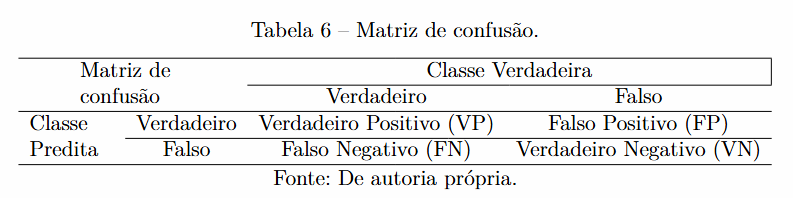

## K-NN

In [ ]:
# Definição dos parâmetros.
k_range = list(range(1, 31))
# Criando o dicionário que contém os diferentes parâmetros.
param_grid = dict(n_neighbors=k_range)
# Definindo o modelo
knn = KNeighborsClassifier()


# Realizando Grid Search do hiperparâmetro por meio de Cross Validation
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False) 

grid.fit(attributes_new, labels)
# Escolhendo o melhor parâmetro.
highest_performance = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
highest_performance

,mean_test_score,std_test_score,params
0,0.663399,0.083138,{'n_neighbors': 1}
1,0.686928,0.074762,{'n_neighbors': 2}
2,0.698039,0.076042,{'n_neighbors': 3}
3,0.639869,0.066023,{'n_neighbors': 4}
4,0.696732,0.071430,{'n_neighbors': 5}
5,0.709150,0.037773,{'n_neighbors': 6}
6,0.697386,0.045358,{'n_neighbors': 7}
7,0.732680,0.079093,{'n_neighbors': 8}
8,0.745098,0.075433,{'n_neighbors': 9}
9,0.756209,0.066641,{'n_neighbors': 10}


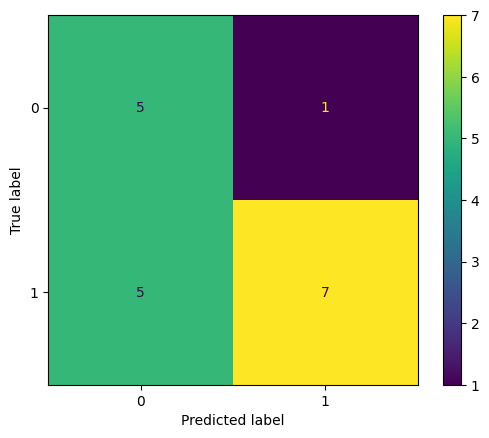

In [ ]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
KNeighbors = KNeighborsClassifier(n_neighbors=3,weights="uniform")
KNeighbors = KNeighbors.fit(X_train,y_train)
y_pred = KNeighbors.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNeighbors.classes_)
disp.plot()

# Naive Bayes

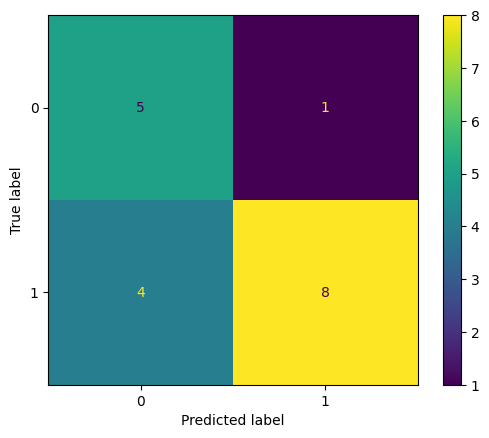

In [25]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
gnb = GaussianNB() # Classificador Naive Bayes gaussiano
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()

# Árvore de Classificação

In [100]:
# Definição dos parâmetros.
max_depth_range = list(range(2, 30))
# Criando o dicionário que contém os diferentes parâmetros.
param_grid = dict(max_depth=max_depth_range)
# Definindo o modelo
clf = tree.DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=False)

grid.fit(X_train, y_train)
# Escolhendo o melhor parâmetro.
highest_performance = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
highest_performance

,mean_test_score,std_test_score,params
0,0.646154,0.073438,{'max_depth': 2}
1,0.662637,0.081911,{'max_depth': 3}
2,0.662637,0.093542,{'max_depth': 4}
3,0.635165,0.093413,{'max_depth': 5}
4,0.632967,0.101872,{'max_depth': 6}
5,0.618681,0.094186,{'max_depth': 7}
6,0.618681,0.094186,{'max_depth': 8}
7,0.632967,0.101872,{'max_depth': 9}
8,0.632967,0.101872,{'max_depth': 10}
9,0.618681,0.094186,{'max_depth': 11}


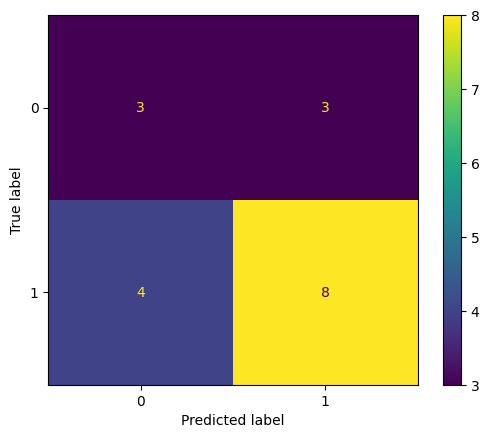

In [101]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNeighbors.classes_)
disp.plot()

# Floresta Aleatória

In [ ]:
# Definição dos parâmetros.
max_depth_range = list(range(2, 10))
# Criando o dicionário que contém os diferentes parâmetros.
param_grid = dict(max_depth=max_depth_range)
# Definindo o modelo
clf = RandomForestClassifier(random_state=0)

grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=False)

grid.fit(attributes_new, labels)
# Escolhendo o melhor parâmetro.
highest_performance = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
highest_performance

,mean_test_score,std_test_score,params
0,0.709150,0.117828,{'max_depth': 2}
1,0.720915,0.113913,{'max_depth': 3}
2,0.651634,0.121533,{'max_depth': 4}
3,0.675163,0.129498,{'max_depth': 5}
4,0.639869,0.099475,{'max_depth': 6}
5,0.639869,0.124224,{'max_depth': 7}
6,0.651634,0.132433,{'max_depth': 8}
7,0.639869,0.134907,{'max_depth': 9}


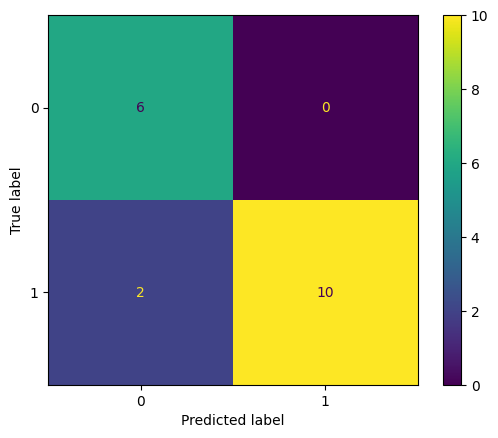

In [ ]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
clf = RandomForestClassifier(random_state=0,max_depth=3)
clf = clf.fit(attributes_new, labels)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNeighbors.classes_)
disp.plot()

# SVM

In [ ]:
# Criando o dicionário que contém os diferentes parâmetros.
param_grid = dict(kernel=['linear', 'poly', 'rbf', 'sigmoid'])
# Definindo o modelo
svc = SVC(gamma='auto')

grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=False)

grid.fit(attributes_new, labels)
# Escolhendo o melhor parâmetro.
highest_performance = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
highest_performance

,mean_test_score,std_test_score,params
0,0.755556,0.069244,{'kernel': 'linear'}
1,0.639216,0.026597,{'kernel': 'poly'}
2,0.754902,0.060117,{'kernel': 'rbf'}
3,0.755556,0.078605,{'kernel': 'sigmoid'}


### Kernel Linear

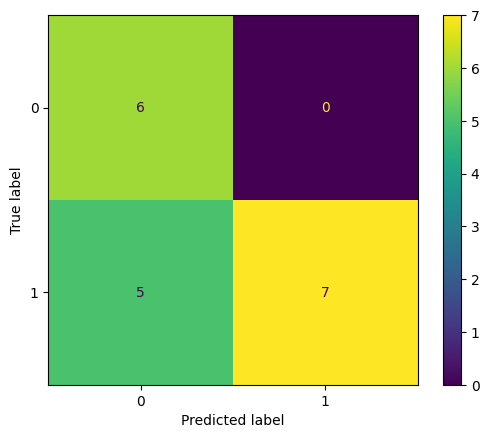

In [36]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
svc = SVC(gamma='auto',kernel='linear')
svc = svc.fit(attributes_new, labels)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

### Kernel Polinomial

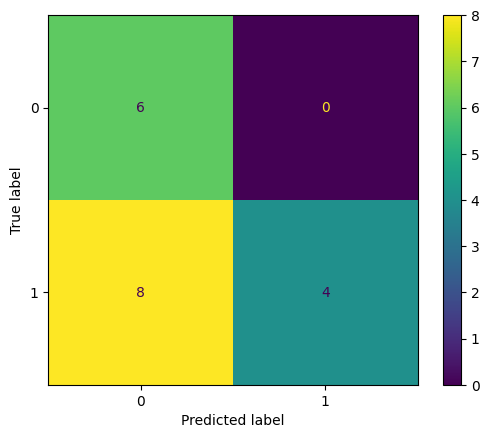

In [38]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
svc = SVC(gamma='auto',kernel='poly')
svc = svc.fit(attributes_new, labels)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

### Kernel RBF

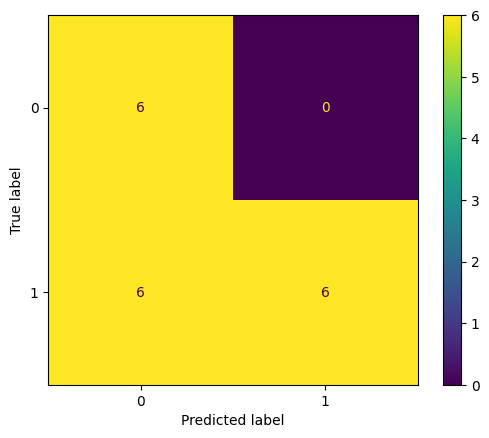

In [39]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
svc = SVC(gamma='auto',kernel='rbf')
svc = svc.fit(attributes_new, labels)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

### Kernel Sigmoid

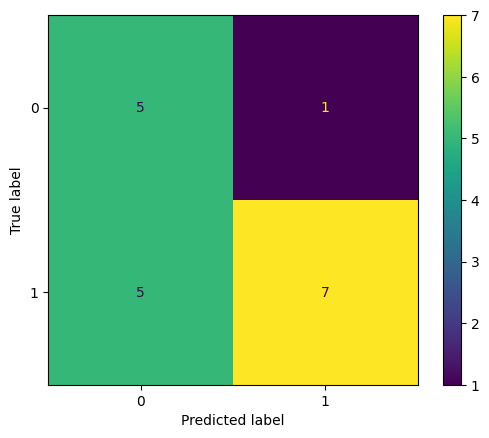

In [40]:
# Construção da matriz de confusão para obter a precisão e revocação do modelo.
svc = SVC(gamma='auto',kernel='sigmoid')
svc = svc.fit(attributes_new, labels)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()

# Kernels Quânticos

### Z Feature

In [57]:
Z_feature_map = ZFeatureMap(feature_dimension=3, reps=2)

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quanutm_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=Z_feature_map)

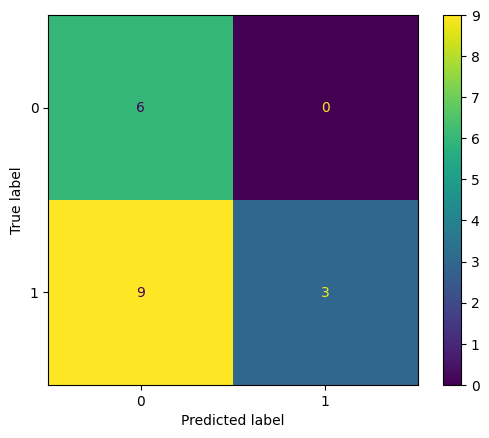

In [ ]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
train_features, test_features, train_labels, test_labels = train_test_split(attributes_new, labels.to_numpy(), test_size=0.2, random_state=0) # Divisão do dataset em 80% para treino e 20% para teste.

quantum_svc = SVC(kernel=quanutm_kernel.evaluate)

quantum_svc = quantum_svc.fit(train_features, train_labels)

y_pred = quantum_svc.predict(test_features)
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=quantum_svc.classes_)
disp.plot()

#### Circuito Quântico

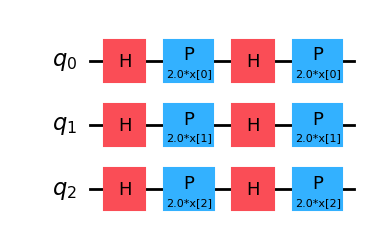

In [69]:
feature_map = ZFeatureMap(feature_dimension=3, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

### ZZ Feature

In [61]:
ZZ_feature_map = ZZFeatureMap(feature_dimension=3, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=ZZ_feature_map)

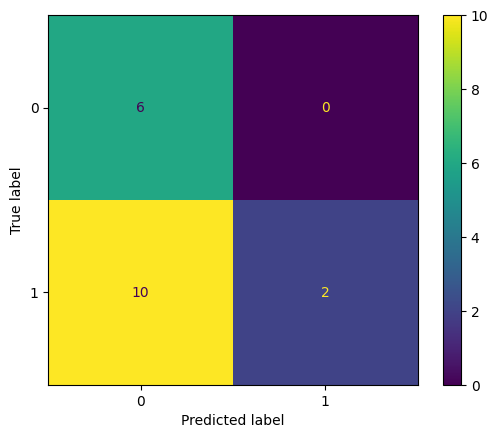

In [62]:
# Construção da matriz de confusão para obter a acurácia, precisão e revocação do modelo.
quantum_svc = SVC(kernel=quantum_kernel.evaluate)
quantum_svc = quantum_svc.fit(train_features, train_labels)

y_pred = quantum_svc.predict(test_features)

cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=quantum_svc.classes_)
disp.plot()

#### Circuito Quântico

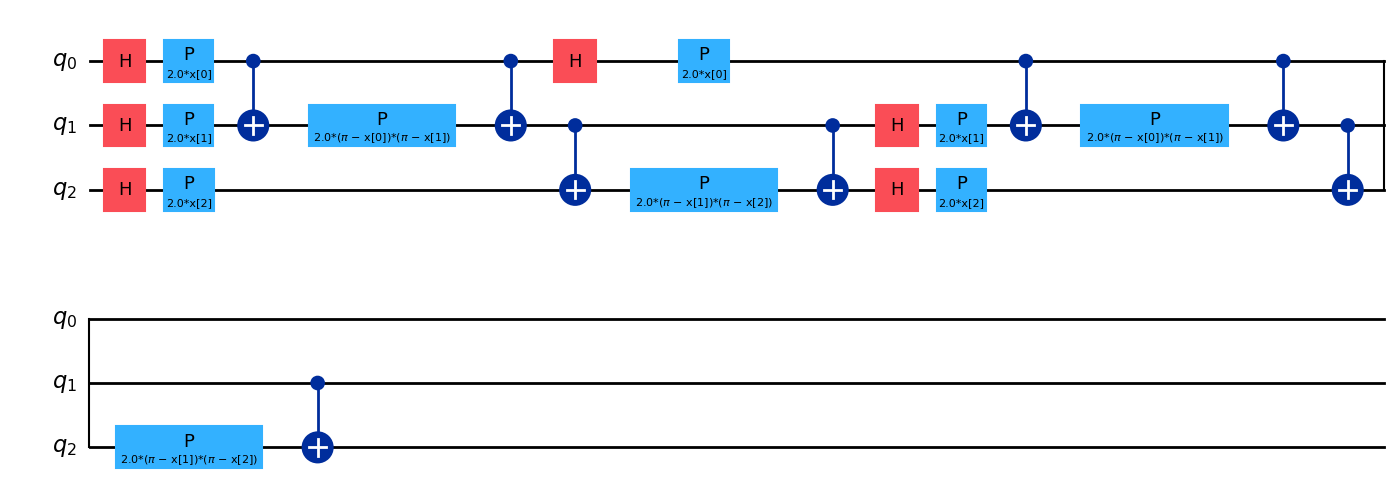

In [70]:
feature_map = ZZFeatureMap(feature_dimension=3, reps=2, entanglement="linear")
feature_map.decompose().draw(output="mpl", fold=20)

### Circuito Completo

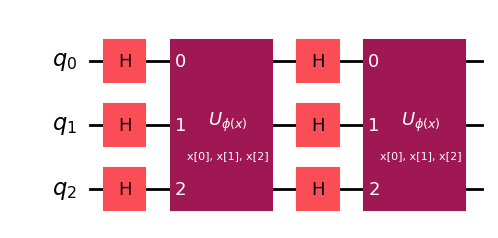

# Gráficos em 3 Dimensões

### Distribuição dos dados

In [49]:
attributes_new_pd = pd.DataFrame(attributes_new,columns=['SBM61', 'SBM67', 'FNC183'])

labels_change = labels

symbols = pd.DataFrame(data=labels.values,columns=["symbols"])

symbols = symbols.replace(0,"Sem")

symbols = symbols.replace(1,"Com")

colours = pd.DataFrame(data=labels.values,columns=["colours"])

colours = colours.replace(0,0)

colours = colours.replace(1,255)

dataset_px = pd.concat([attributes_new_pd,labels,symbols,colours],axis=1)


fig = px.scatter_3d(dataset_px , x='SBM61', y='SBM67', z='FNC183',
              color='colours',color_discrete_sequence=['#10069F','#121690'],color_discrete_map=['#10069F','#121690'],symbol='symbols',symbol_sequence=["circle","circle-open"],labels='Class')

fig.update_layout(legend_title_text='Classes')
fig.update_coloraxes(showscale=False)
fig.update_layout(yaxis = dict(nticks=4, range=[-0.6,0.6]))

fig.show()

### Support Vector Machine com kernel linear aplicada aos dados

In [50]:
attributes_new_pd = pd.DataFrame(attributes_new,columns=['SBM61', 'SBM67', 'FNC183'])

labels_change = labels

symbols = pd.DataFrame(data=labels.values,columns=["symbols"])

symbols = symbols.replace(0,"Sem")

symbols = symbols.replace(1,"Com")

colours = pd.DataFrame(data=labels.values,columns=["colours"])

colours = colours.replace(0,0)

colours = colours.replace(1,255)

dataset_px = pd.concat([attributes_new_pd,labels,symbols,colours],axis=1)

fig = px.scatter_3d(dataset_px , x='SBM61', y='SBM67', z='FNC183',
              color='colours',color_discrete_sequence=['#10069F','#121690'],color_discrete_map=['#10069F','#121690'],symbol='symbols',symbol_sequence=["circle","circle-open"],labels='Class')

fig.update_layout(legend_title_text='Classes')
fig.update_coloraxes(showscale=False)

###################################################
# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(attributes_new,labels.values.tolist())

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

xm, xM = attributes_new[:,0].min(), attributes_new[:, 0].max()
ym, yM = attributes_new[:,1].min(), attributes_new[:, 1].max()
x = np.linspace(xm, xM, 50)
y = np.linspace(ym, yM, 50)
x, y =np.meshgrid(x, y)

my_colorscale= [[0, 'rgb(100,100,100)'], [1, 'rgb(100,100,100)']]

fig.add_surface(x=x, y=y, z=z(x,y), colorscale=my_colorscale, showscale=False, opacity=0.7)
###################################################
fig.update_layout(scene_aspectmode='cube')
fig.update_layout(
    scene = dict(zaxis = dict(nticks=7, range=[-0.62,0.62])))


fig.show()

# Imagens de Teste do Artigo do Havlicek

Fonte: https://qiskit-community.github.io/qiskit-machine-learning/tutorials/03_quantum_kernel.html

Havlíček, V., Córcoles, A.D., Temme, K. et al. Supervised learning with quantum-enhanced feature spaces. Nature 567, 209–212 (2019). https://doi.org/10.1038/s41586-019-0980-2

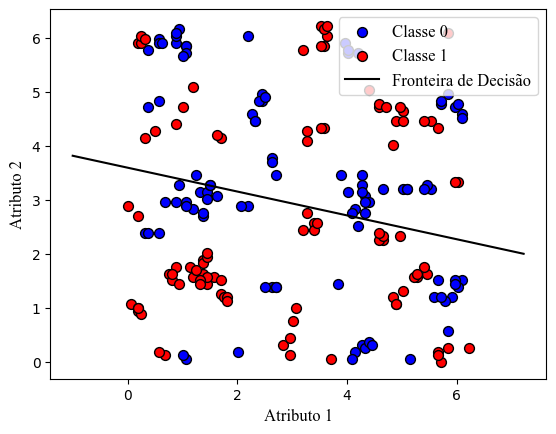

In [66]:
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=80,
    test_size=20,
    n=adhoc_dimension,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)


train_features = pd.DataFrame(train_features,columns=['Atributo 1', 'Atributo 2'])

test_features = pd.DataFrame(test_features,columns=['Atributo 1', 'Atributo 2'])

features_kernel = pd.concat([train_features,test_features],axis=0).reset_index(drop=True)

train_labels = pd.DataFrame(train_labels,columns=['Class'])

test_labels = pd.DataFrame(test_labels,columns=['Class'])

labels_change = pd.concat([train_labels,test_labels],axis=0).reset_index(drop=True)

attributes_new_pd = features_kernel

symbols = pd.DataFrame(data=labels_change.values,columns=["symbols"])

symbols = symbols.replace(0,"Sem")

symbols = symbols.replace(1,"Com")

colours = pd.DataFrame(data=labels_change.values,columns=["colours"])

colours = colours.replace(0,255)

colours = colours.replace(1,0)

dataset_px = pd.concat([attributes_new_pd,labels_change,symbols,colours],axis=1)

x = attributes_new_pd

y = labels_change

# Adicionar os pontos de dados
plt.scatter(x[y['Class'] == 0]['Atributo 1'], x[y['Class'] == 0]['Atributo 2'], color='blue', label='Classe 0', s=50,edgecolors="k")
plt.scatter(x[y['Class'] == 1]['Atributo 1'], x[y['Class'] == 1]['Atributo 2'], color='red', label='Classe 1', s=50,edgecolors="k")

svc = SVC(kernel='linear')
svc.fit(x,y)

W = [svc.coef_[0][0],svc.coef_[0][1]]
b = svc.intercept_[0]

# Adicionar a fronteira de decisão e margens
x_min, x_max = x['Atributo 1'].min() - 1, x['Atributo 1'].max() + 1
x_vals = np.linspace(x_min, x_max, 100)
y_decision = -(W[0] * x_vals + b) / W[1]  # Fronteira de decisão

plt.plot(x_vals, y_decision, 'k-', label='Fronteira de Decisão')

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)
plt.xlabel("Atributo 1",fontdict = font_axes)
plt.ylabel("Atributo 2",fontdict = font_axes)
plt.legend(prop=font_legend)
plt.show()

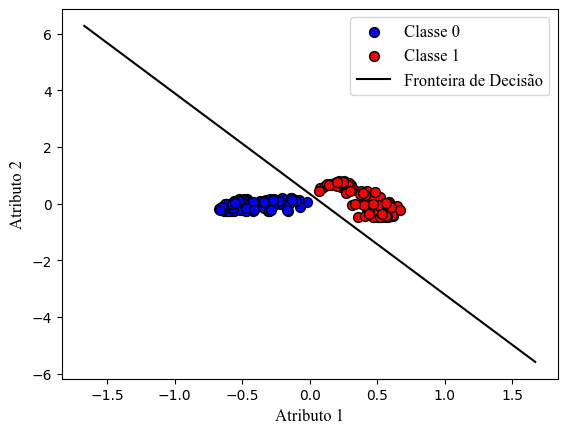

In [67]:
ZZ_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=ZZ_feature_map)

matrix_train = quantum_kernel.evaluate(x_vec=train_features)
matrix_test = quantum_kernel.evaluate(x_vec=test_features, y_vec=train_features)

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

train_features_q = pd.DataFrame(train_features_q,columns=['Atributo 1', 'Atributo 2'])

test_features_q = pd.DataFrame(test_features_q,columns=['Atributo 1', 'Atributo 2'])

features_kernel = pd.concat([train_features_q,test_features_q],axis=0).reset_index(drop=True)

train_labels = pd.DataFrame(train_labels,columns=['Class'])

test_labels = pd.DataFrame(test_labels,columns=['Class'])

labels_change = pd.concat([train_labels,test_labels],axis=0).reset_index(drop=True)

attributes_new_pd = features_kernel

symbols = pd.DataFrame(data=labels_change.values,columns=["symbols"])

symbols = symbols.replace(0,"Sem")

symbols = symbols.replace(1,"Com")

colours = pd.DataFrame(data=labels_change.values,columns=["colours"])

colours = colours.replace(0,255)

colours = colours.replace(1,0)


x = attributes_new_pd

y = labels_change

# Adicionar os pontos de dados
plt.scatter(x[y['Class'] == 0]['Atributo 1'], x[y['Class'] == 0]['Atributo 2'], color='blue', label='Classe 0', s=50,edgecolors="k")
plt.scatter(x[y['Class'] == 1]['Atributo 1'], x[y['Class'] == 1]['Atributo 2'], color='red', label='Classe 1', s=50,edgecolors="k")

svc = SVC(kernel='linear')
svc.fit(x,y)

W = [svc.coef_[0][0],svc.coef_[0][1]]
b = svc.intercept_[0]

# Adicionar a fronteira de decisão e margens
x_min, x_max = x['Atributo 1'].min() - 1, x['Atributo 1'].max() + 1
x_vals = np.linspace(x_min, x_max, 100)
y_decision = -(W[0] * x_vals + b) / W[1]  # Fronteira de decisão

plt.plot(x_vals, y_decision, 'k-', label='Fronteira de Decisão')

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)
plt.xlabel("Atributo 1",fontdict = font_axes)
plt.ylabel("Atributo 2",fontdict = font_axes)
plt.legend(prop=font_legend)
plt.show()

# Imagens da Fronteira de Decisão

### K-NN

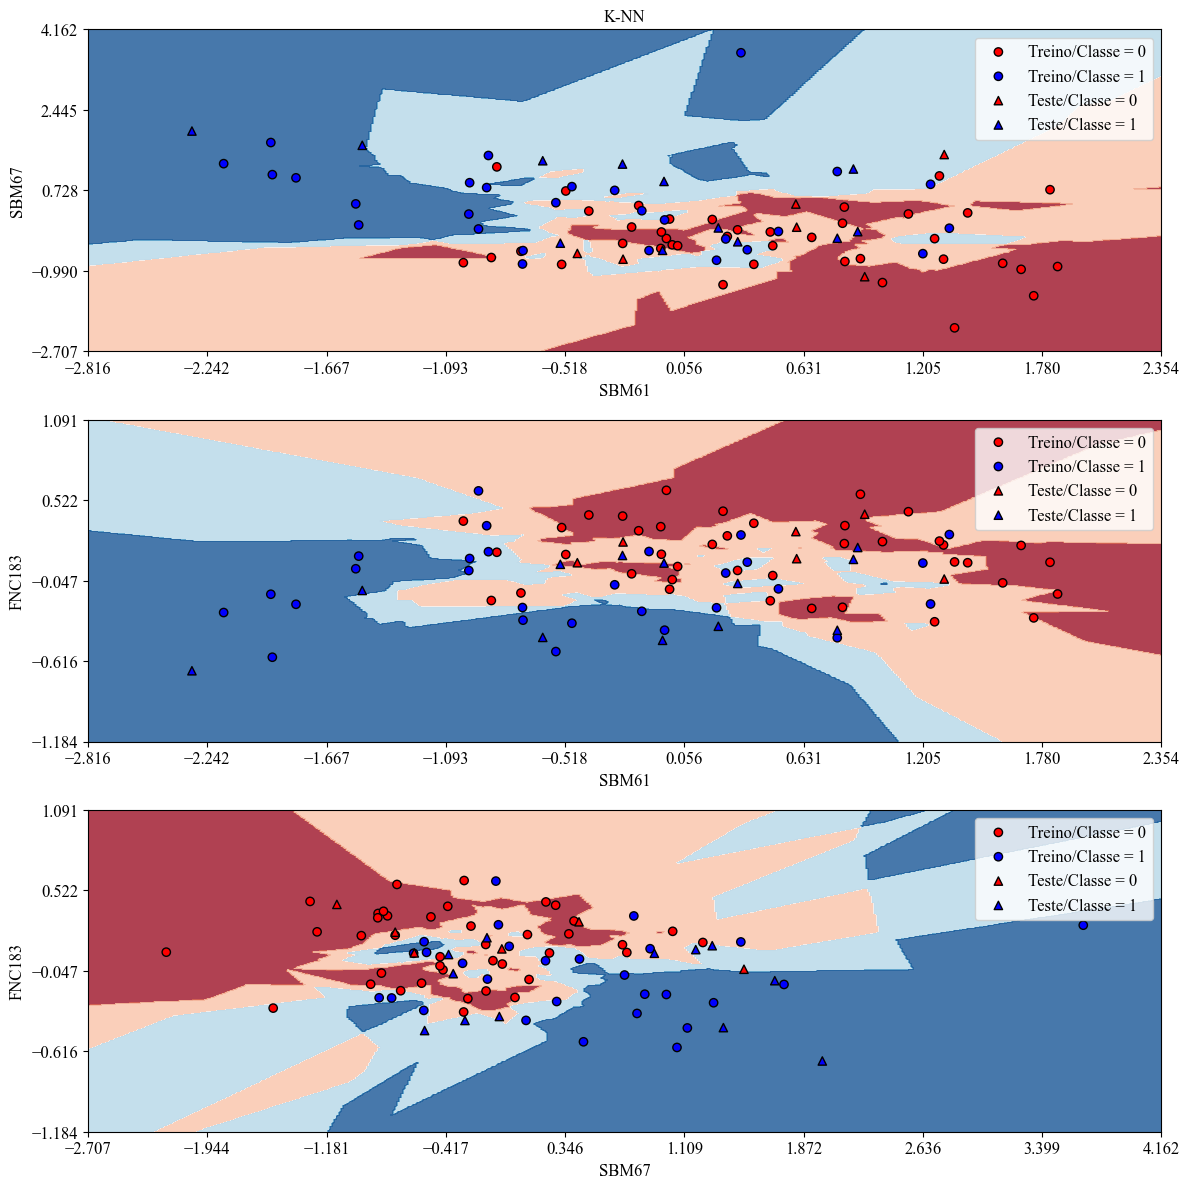

In [76]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause


font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

classifiers = [KNeighborsClassifier(n_neighbors=3,weights="uniform")]

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), len(classifiers), i+1)
    
    kNN = KNeighborsClassifier(n_neighbors=3,weights="uniform")
    clf = make_pipeline(StandardScaler(), kNN)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("K-NN",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### Naive Bayes

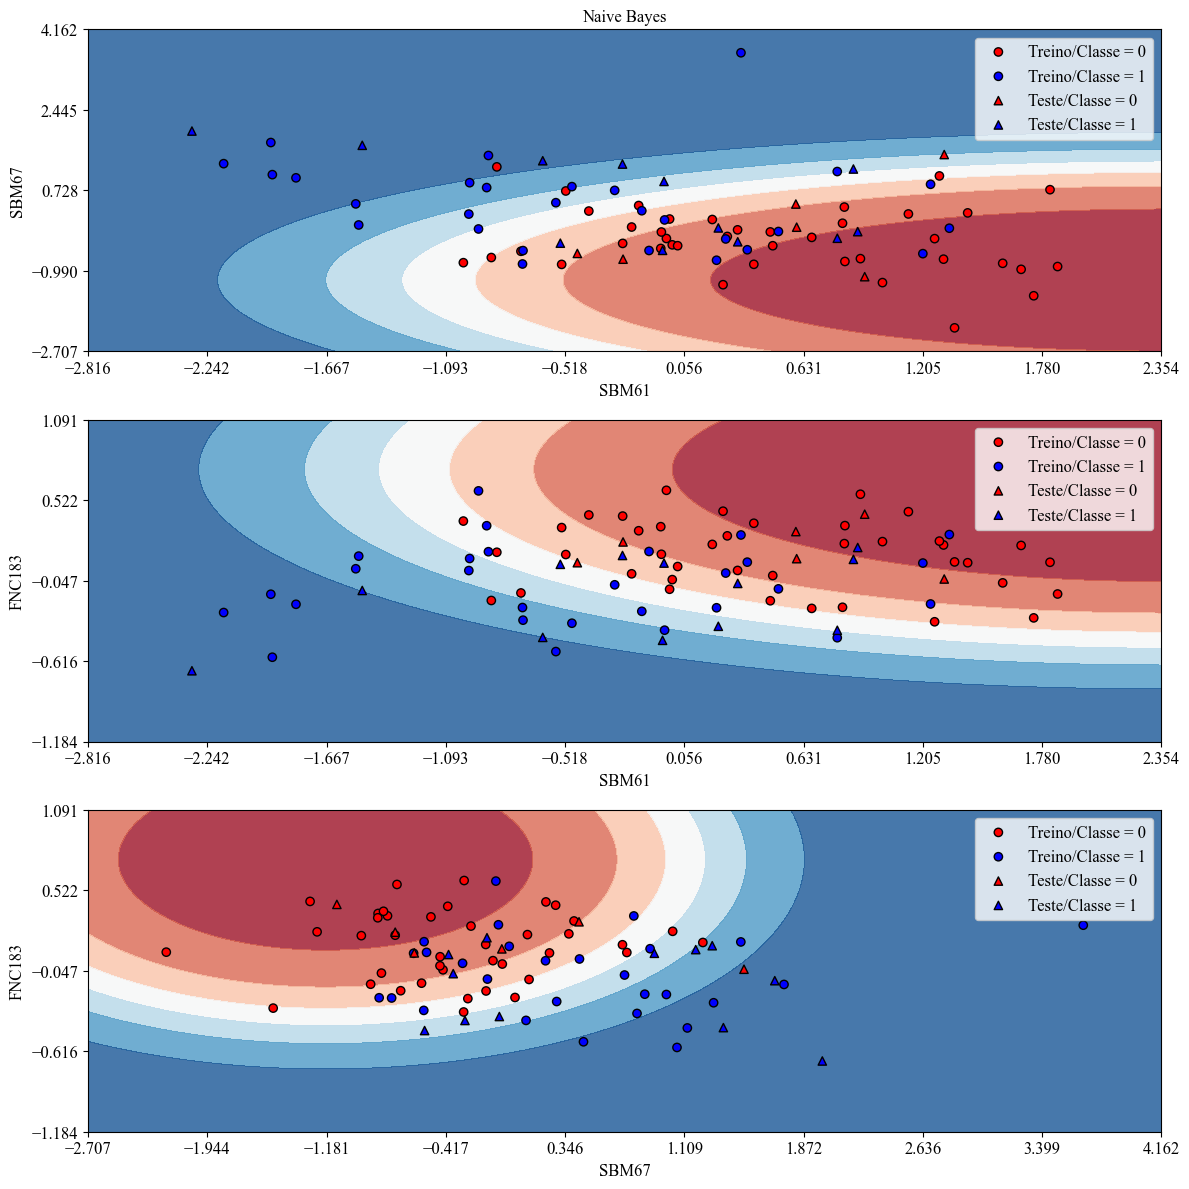

In [77]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    gnb = GaussianNB()
    clf = make_pipeline(StandardScaler(), gnb)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("Naive Bayes",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### Árvore de Decisão

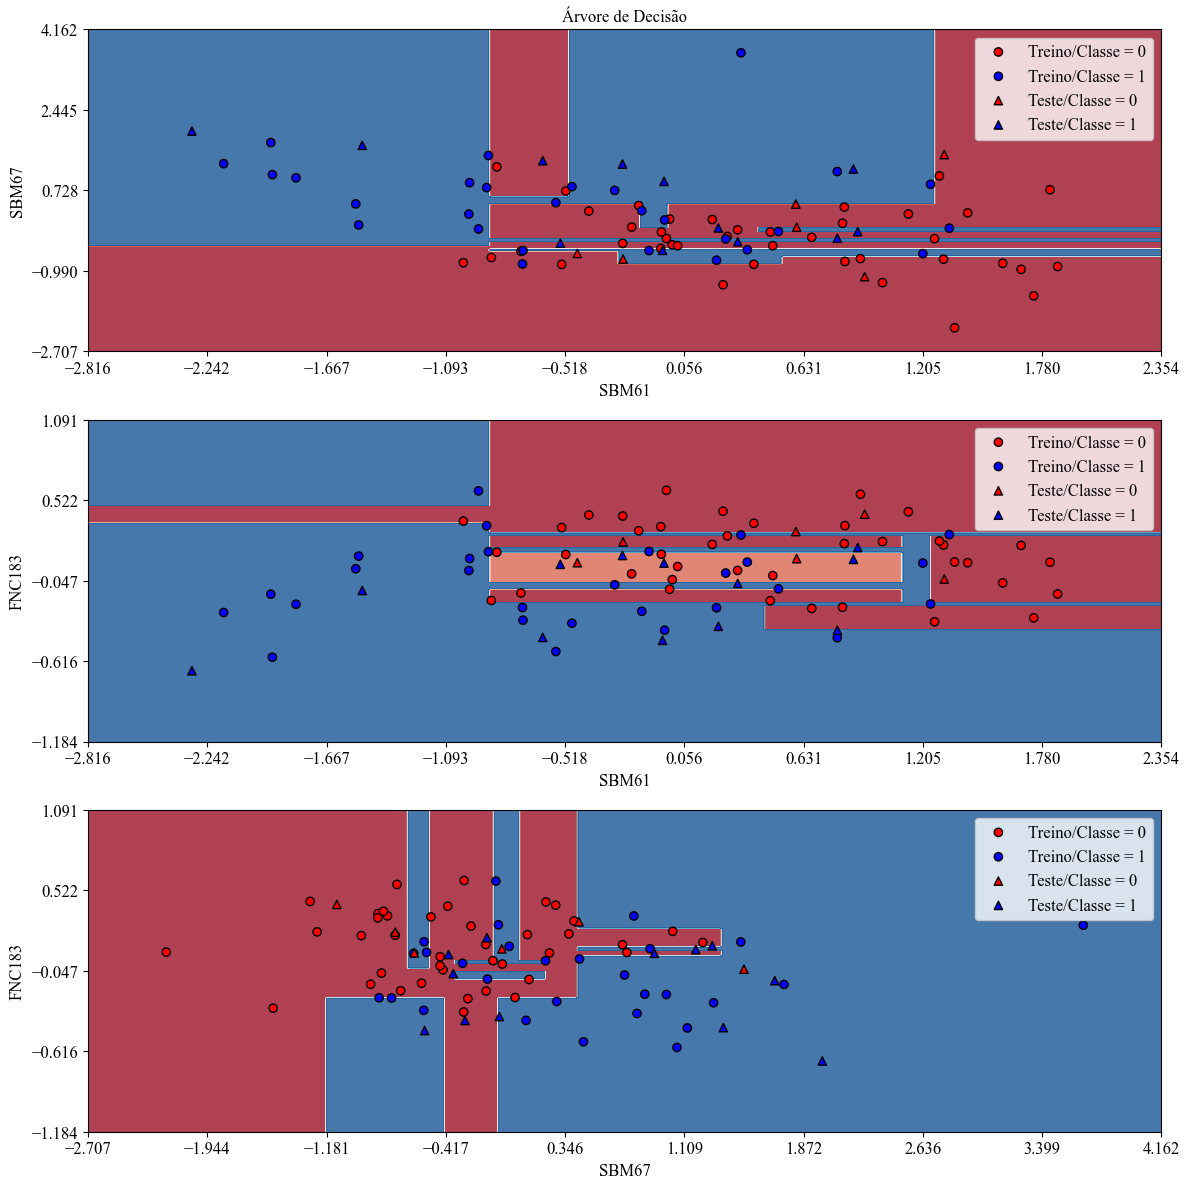

In [78]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    decision_tree = tree.DecisionTreeClassifier(max_depth=10)
    clf = make_pipeline(StandardScaler(), decision_tree)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("Árvore de Decisão",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### Floresta Aleatória

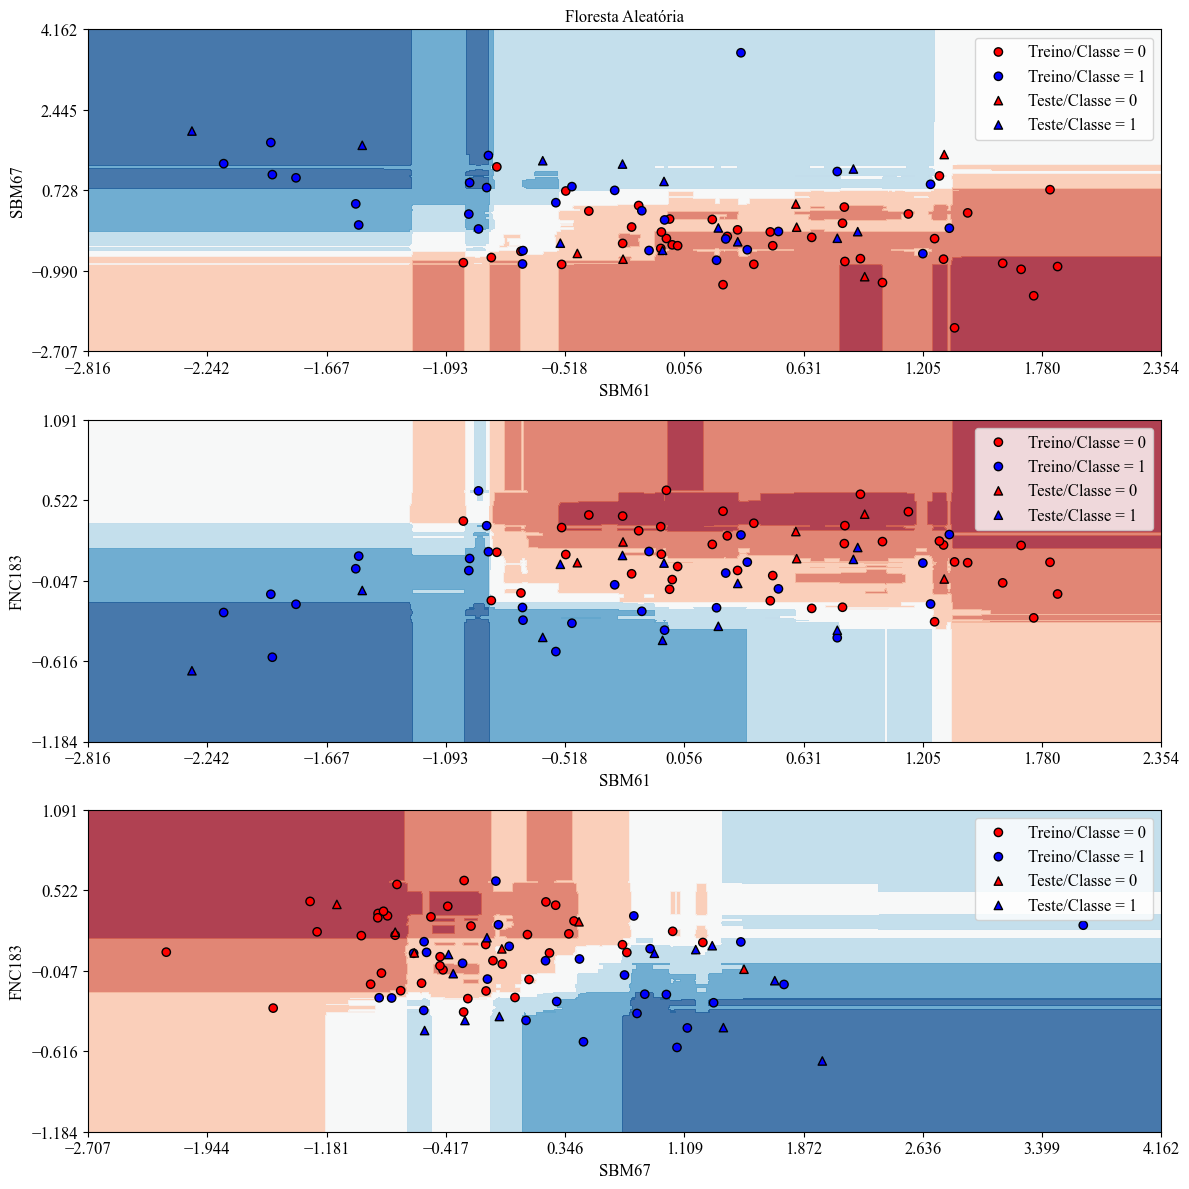

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    clf = RandomForestClassifier(random_state=0,max_depth=3)
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("Floresta Aleatória",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### SVM Linear

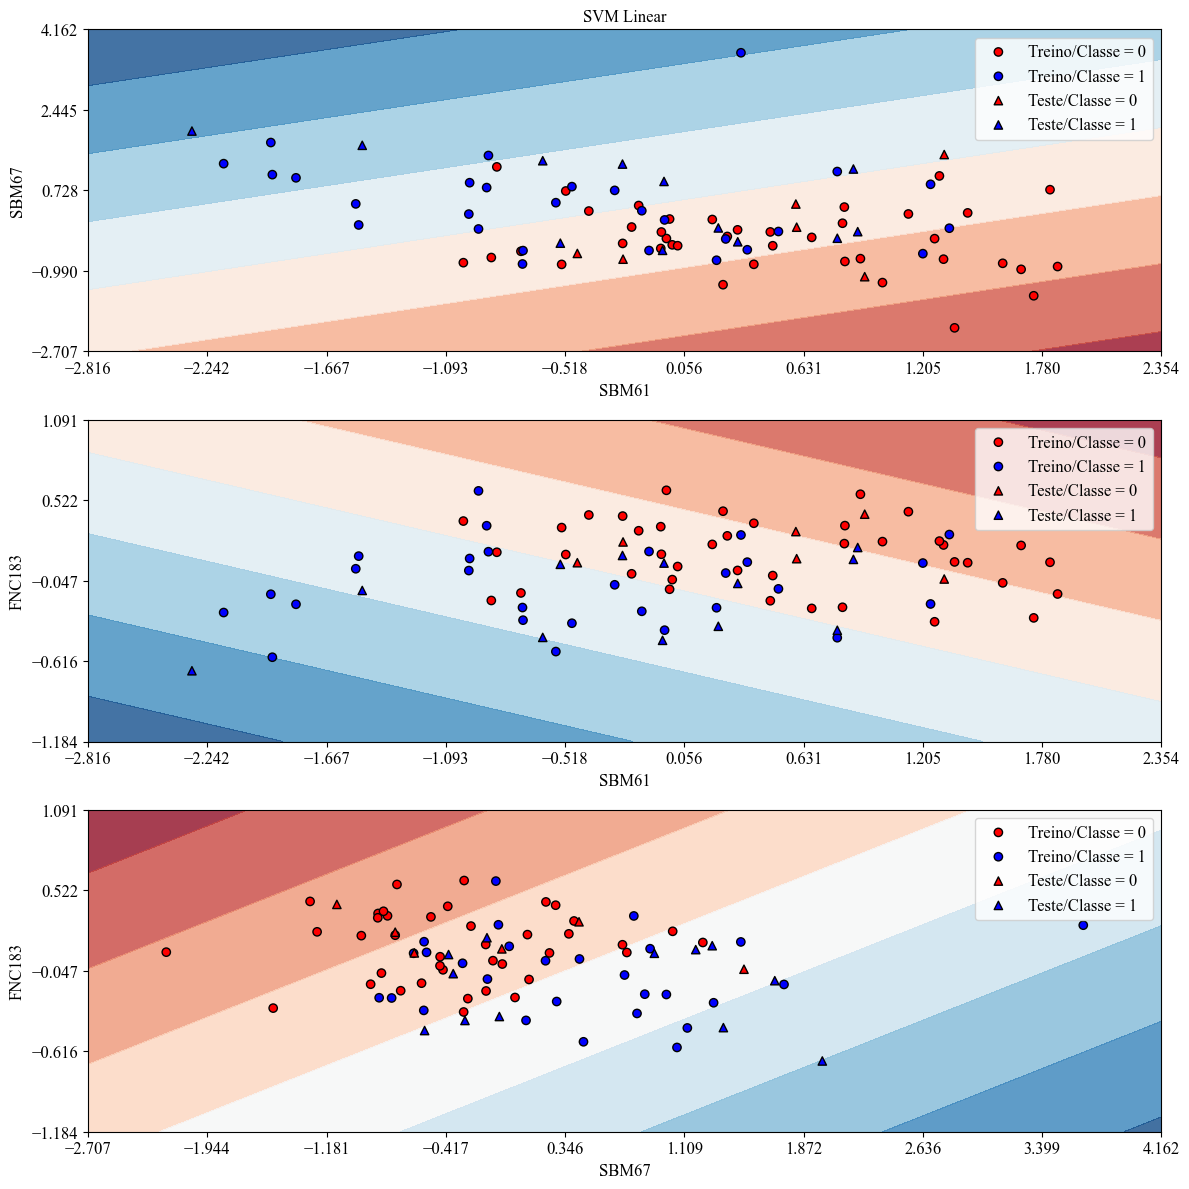

In [79]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

font_axes = {'family':'Times New Roman','color':'black','size':12}


font_legend = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=12)

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    svc = SVC(gamma='auto',kernel='linear')
    clf = make_pipeline(StandardScaler(), svc)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("SVM Linear",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### SVM RBF

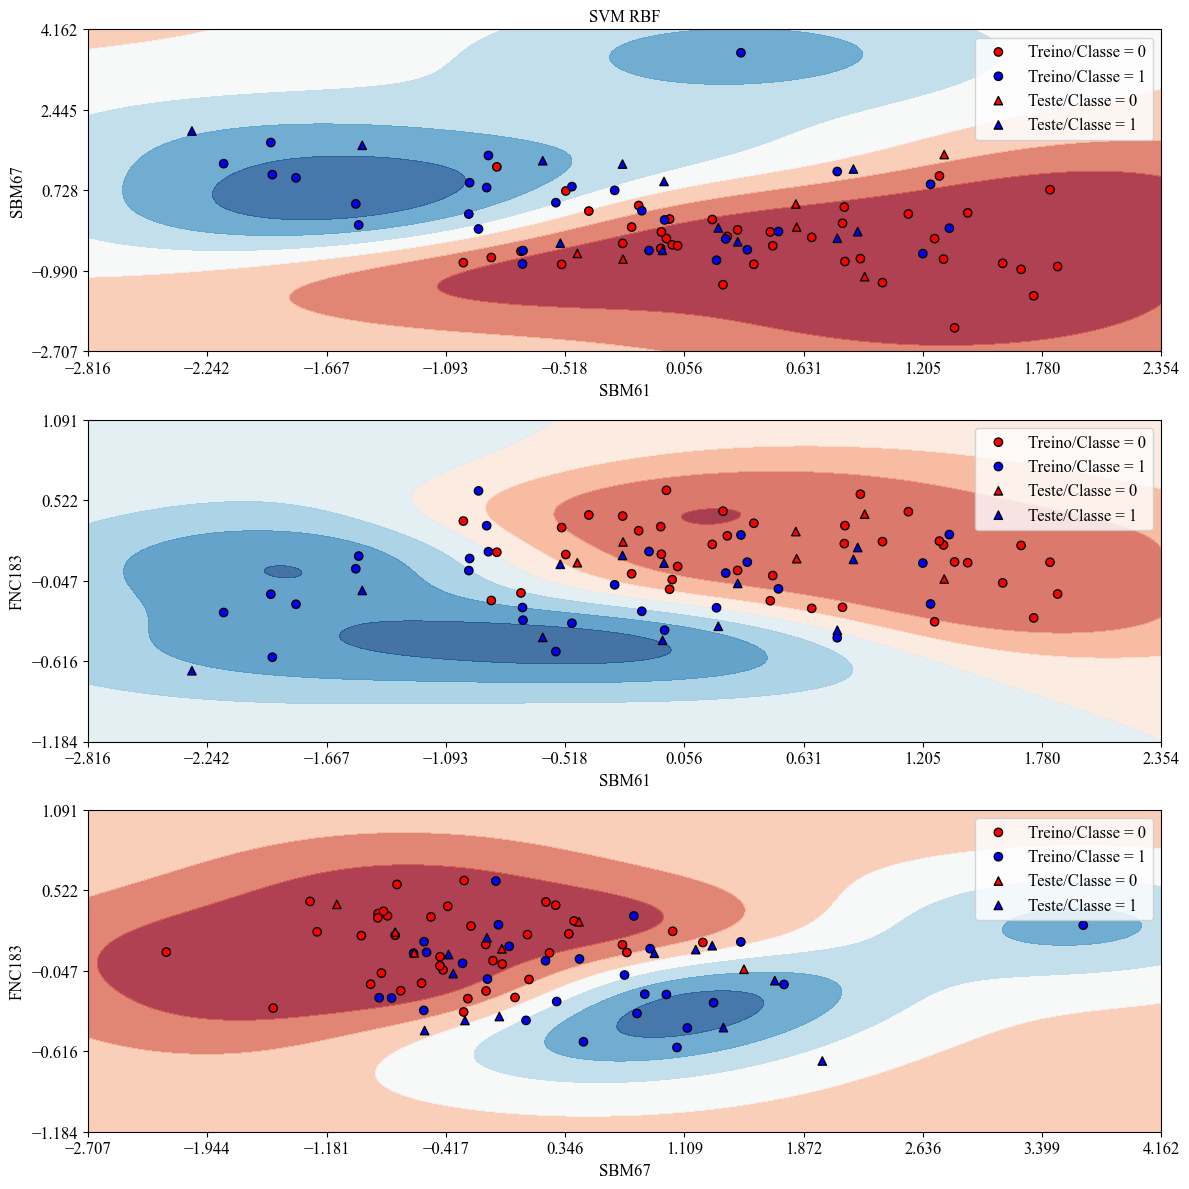

In [80]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    svc = SVC(gamma='auto',kernel='rbf')
    clf = make_pipeline(StandardScaler(), svc)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("SVM RBF",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### SVM Polinomial

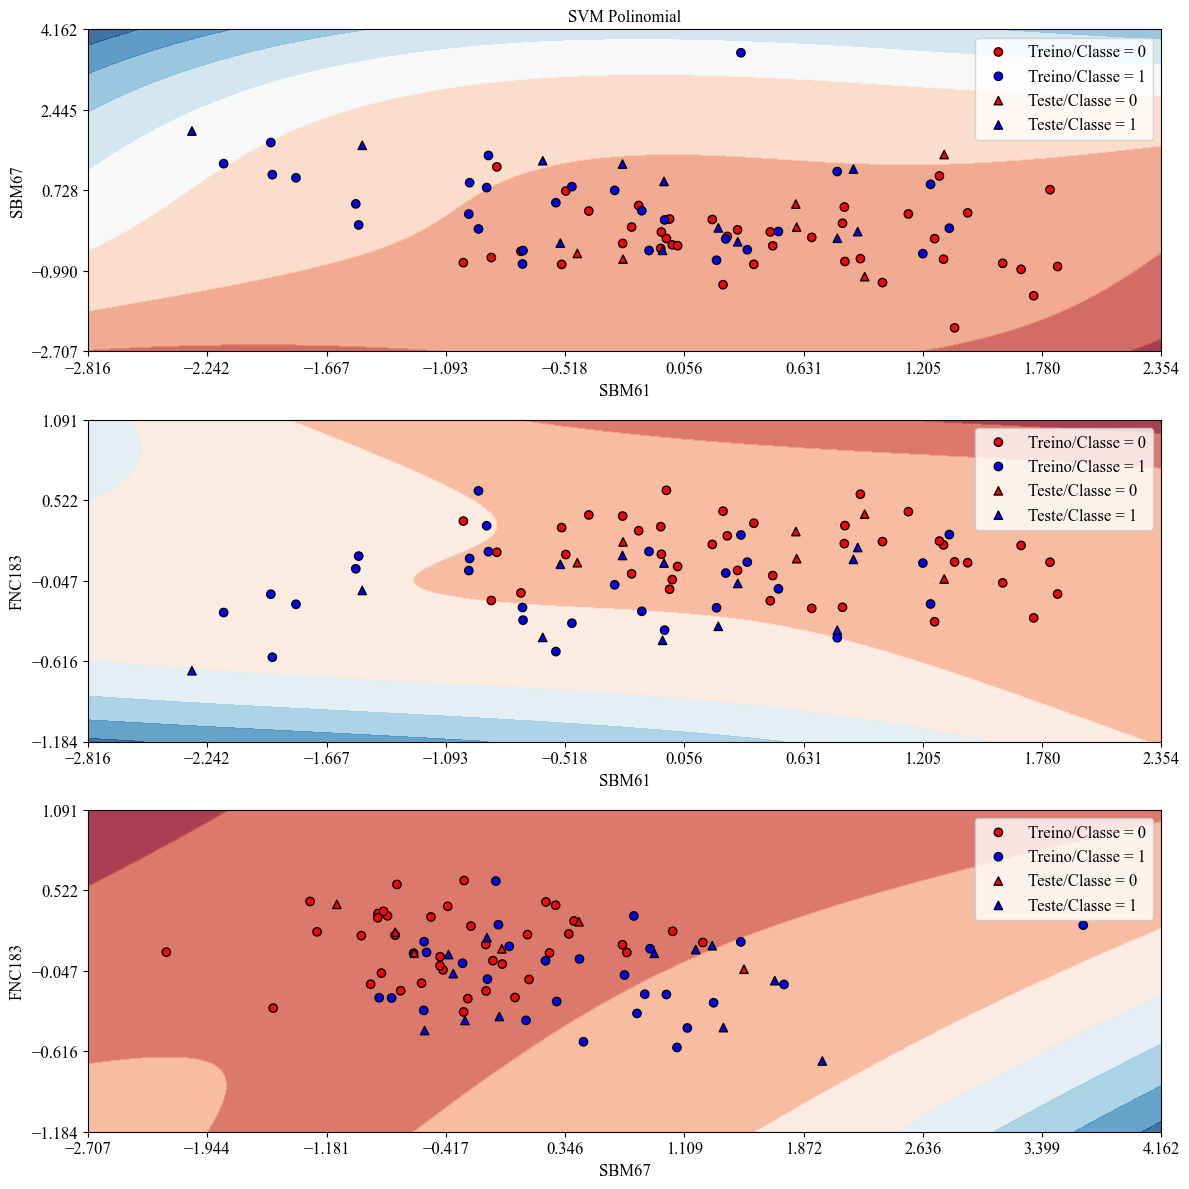

In [81]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    svc = SVC(gamma='auto',kernel='poly')
    clf = make_pipeline(StandardScaler(), svc)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("SVM Polinomial",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### SVM Sigmoid

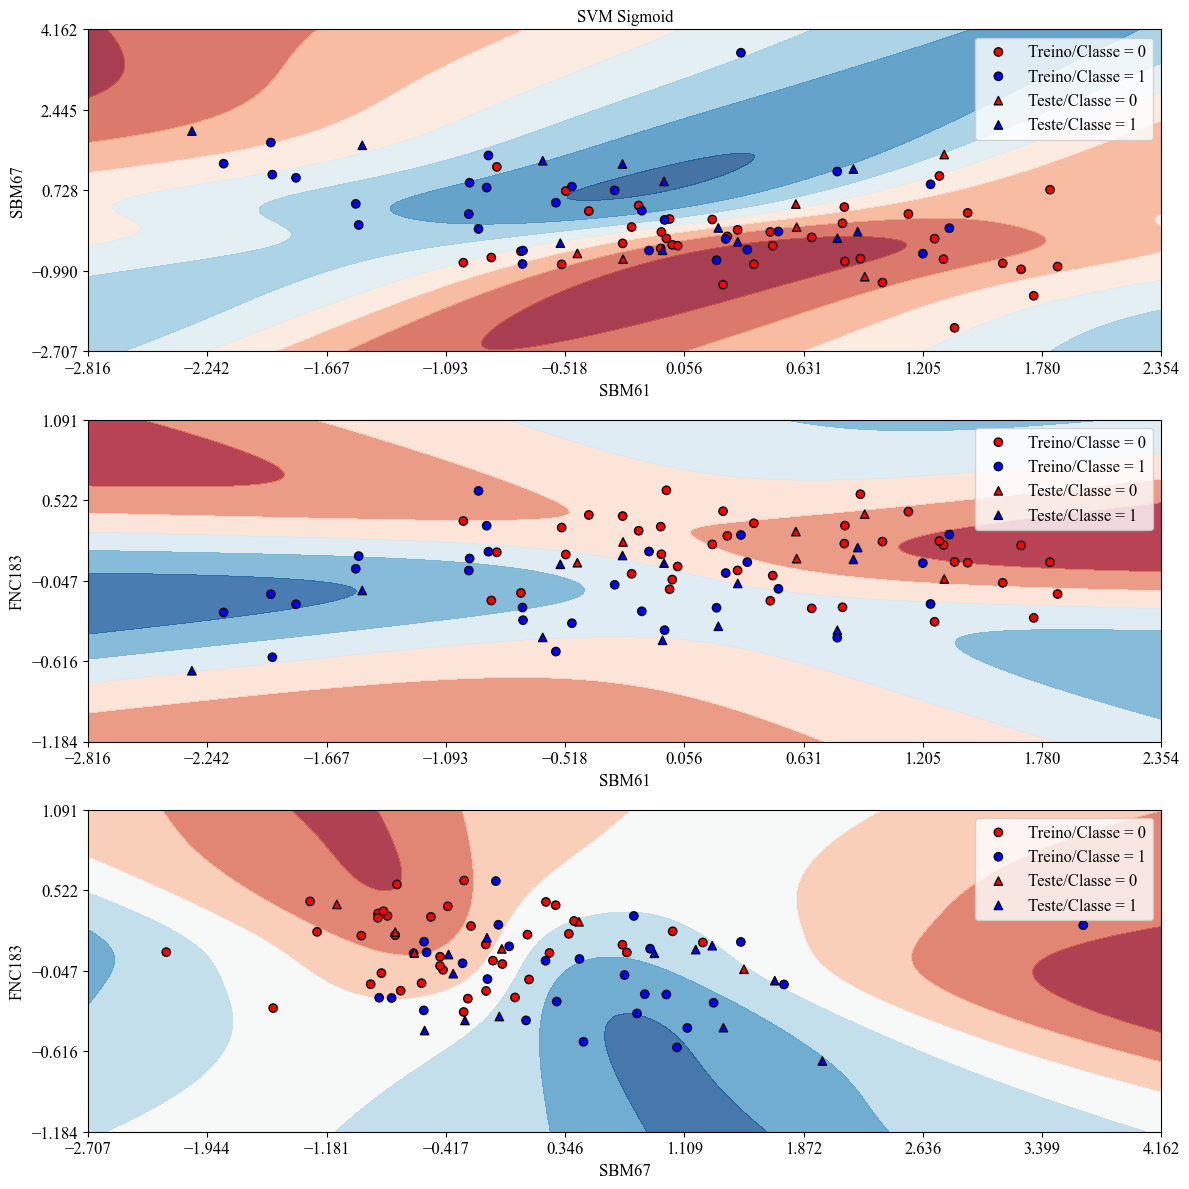

In [82]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    
    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])

    ax = plt.subplot(len(datasets), 1, i+1)
    

    svc = SVC(gamma='auto',kernel='sigmoid')
    clf = make_pipeline(StandardScaler(), svc)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=500,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("SVM Sigmoid",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### ZZ Feature

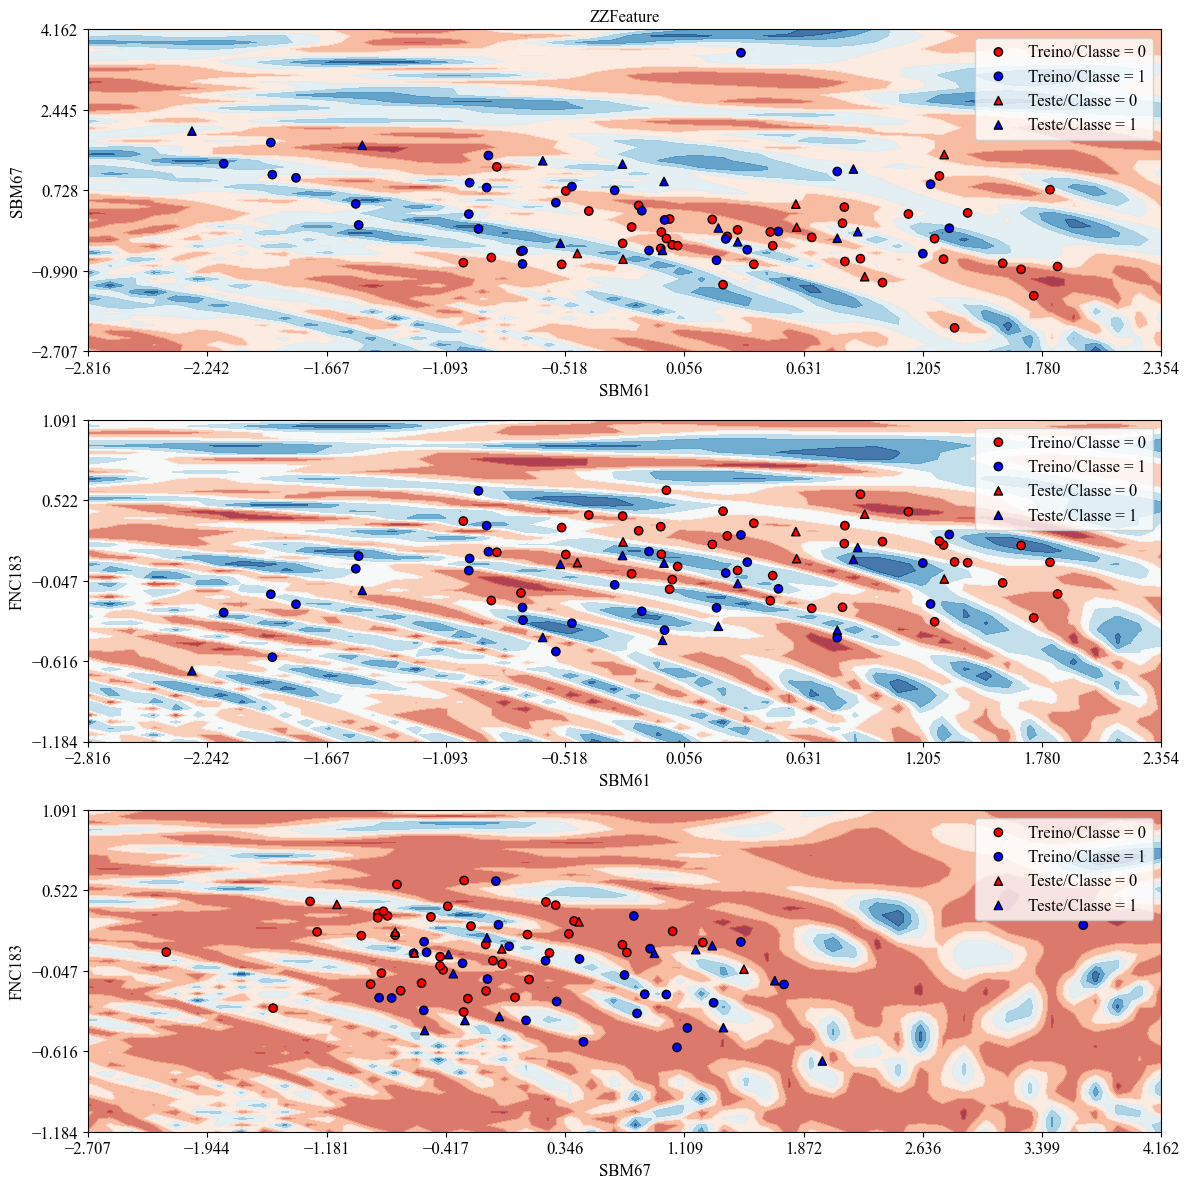

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

feature_map_ZZ = ZZFeatureMap(feature_dimension=3, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_ZZ)

classifiers = [SVC(kernel=quantum_kernel.evaluate)]

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])



    ax = plt.subplot(len(datasets), len(classifiers), i+1)
    

    qsvc = QSVC(quantum_kernel=quantum_kernel)
    
    clf = make_pipeline(StandardScaler(), qsvc)
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=50,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("ZZFeature",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

### Z Feature

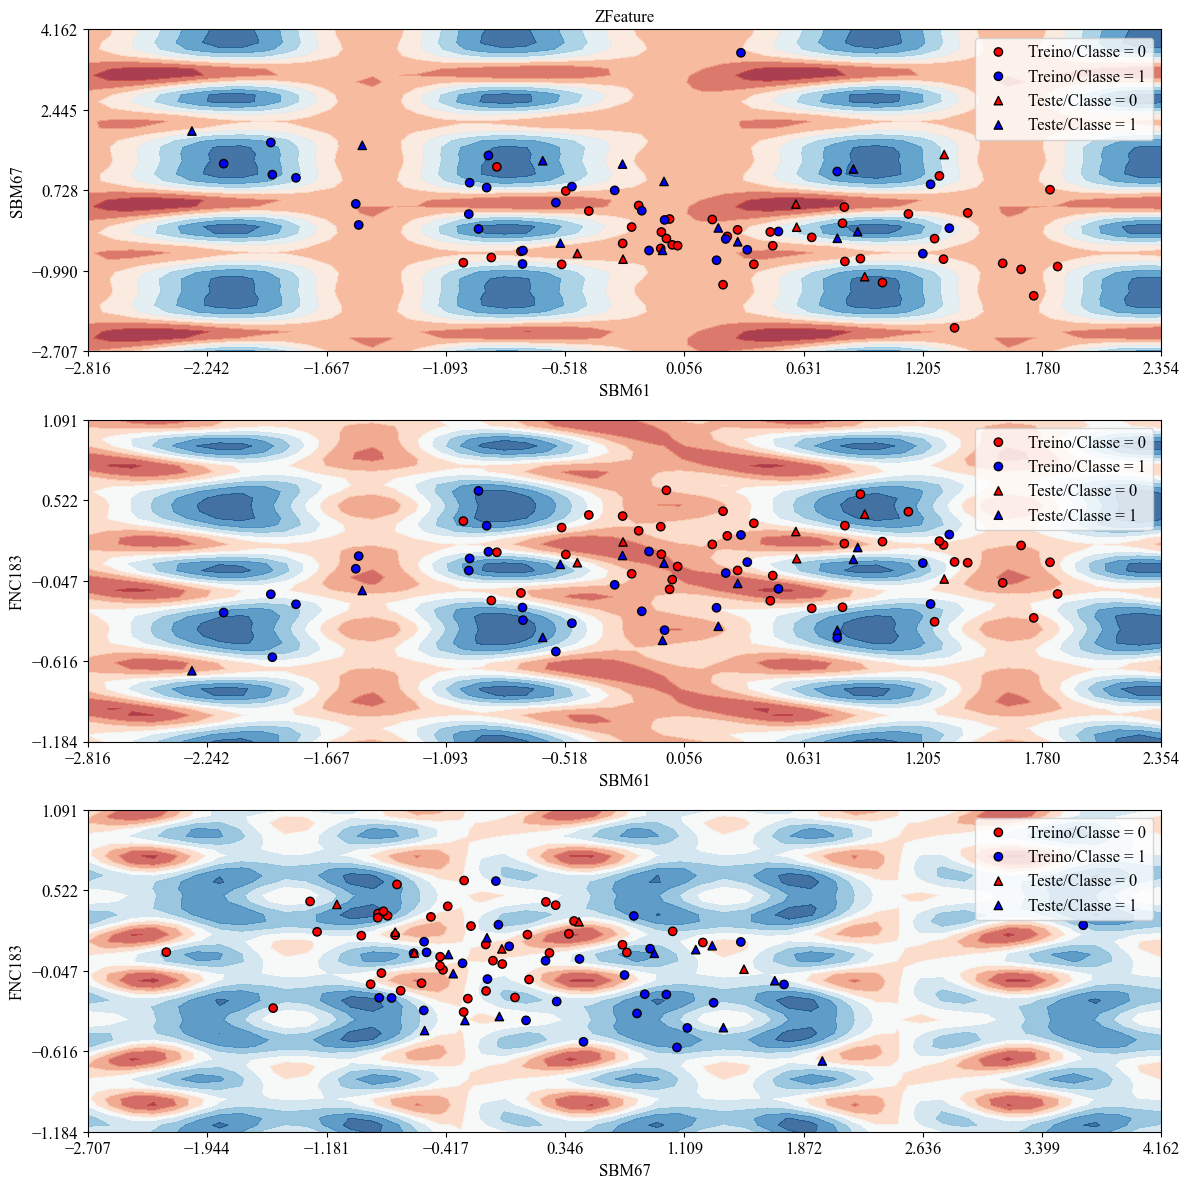

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

feature_map_Z = ZFeatureMap(feature_dimension=3, reps=3)

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_Z)

classifiers = [SVC(kernel=quantum_kernel.evaluate)]

X_01 = np.array(attributes_new[:,(0,1)])

X_02 = np.array(attributes_new[:,(0,2)])

X_12 = np.array(attributes_new[:,(1,2)])

y = np.array(labels.values.tolist())

y = np.reshape(y,(y.shape[0]))

pairs = [('SBM61','SBM67'), ('SBM61','FNC183'), ('SBM67','FNC183')]

datasets = [(X_01,y),(X_02,y),(X_12,y)]

figure = plt.figure(figsize=(12, 12))
i = 0
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    x_train_pd = pd.DataFrame(X_train)

    y_train_pd = pd.DataFrame(y_train,columns=["Class"])

    X_train_0 = x_train_pd[y_train_pd['Class'] == 0].values

    X_train_1 = x_train_pd[y_train_pd['Class'] == 1].values

    y_train_0 = y_train_pd [y_train_pd ['Class'] == 0].values

    y_train_1 = y_train_pd [y_train_pd ['Class'] == 1].values
    
    x_test_pd = pd.DataFrame(X_test)

    y_test_pd = pd.DataFrame(y_test,columns=["Class"])

    X_test_0 = x_test_pd[y_test_pd['Class'] == 0].values

    X_test_1 = x_test_pd[y_test_pd['Class'] == 1].values

    y_test_0 = y_test_pd [y_test_pd ['Class'] == 0].values

    y_test_1 = y_test_pd [y_test_pd ['Class'] == 1].values
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright_0 = ListedColormap(["#FF0000", "#0000FF"])
    cm_bright_1 = ListedColormap(["#0000FF", "#FF0000"])



    ax = plt.subplot(len(datasets), len(classifiers), i+1)
    

    qsvc = QSVC(quantum_kernel=quantum_kernel)
    
    clf = make_pipeline(StandardScaler(), qsvc)

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm, grid_resolution=50,alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points that class == 0
    ax.scatter(
        X_train_0[:, 0], X_train_0[:, 1], c=y_train_0, cmap=cm_bright_0, edgecolors="k",label="Treino/Classe = 0"
    )
    # Plot the training points that class == 1
    ax.scatter(
        X_train_1[:, 0], X_train_1[:, 1], c=y_train_1, cmap=cm_bright_1, edgecolors="k",label="Treino/Classe = 1"
    )
    # Plot the testing points that class == 0
    ax.scatter(
        X_test_0[:, 0],
        X_test_0[:, 1],
        c=y_test_0,
        cmap=cm_bright_0,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 0"
    )
    # Plot the testing points that class == 1
    ax.scatter(
        X_test_1[:, 0],
        X_test_1[:, 1],
        c=y_test_1,
        cmap=cm_bright_1,
        edgecolors="k",
        alpha=1,
        marker="^",
        label="Teste/Classe = 1"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(np.linspace(x_min, x_max, num=10))
    ax.set_yticks(np.linspace(y_min, y_max, num=5))
    # Muda a fonte
    ax.tick_params(axis='both',labelsize = 12,labelfontfamily = 'Times New Roman',labelcolor = 'black')
    # Colocando o título dos eixos
    plt.xlabel(pairs[i][0], fontdict = font_axes)
    plt.ylabel(pairs[i][1], fontdict = font_axes)
    plt.legend(prop=font_legend)
    if ds_cnt == 0:
        ax.set_title("ZFeature",fontdict=font_axes)
    i += 1

plt.tight_layout()
plt.show()

# Comparação de Resultados

## Resultados Obtidos no Trabalho

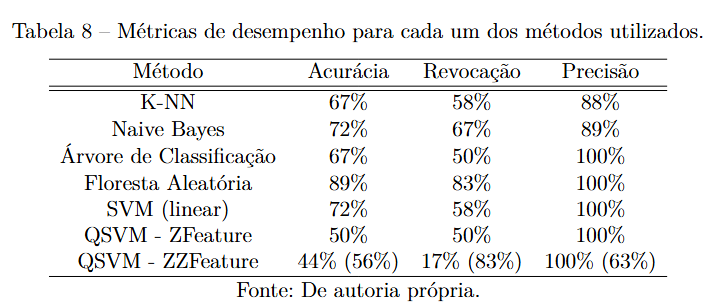

## Resultados de Aksoy et al. (2024).

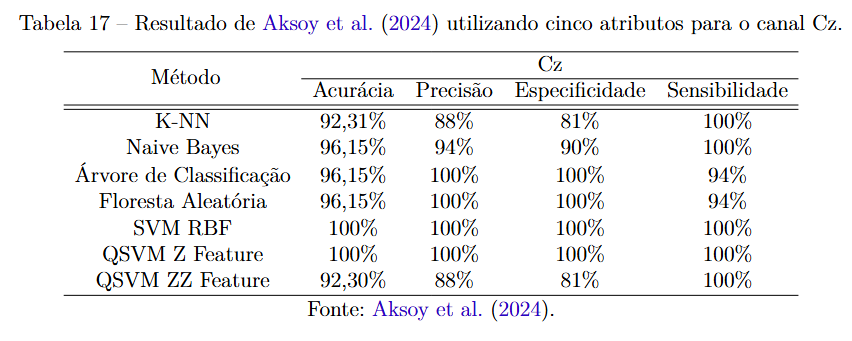

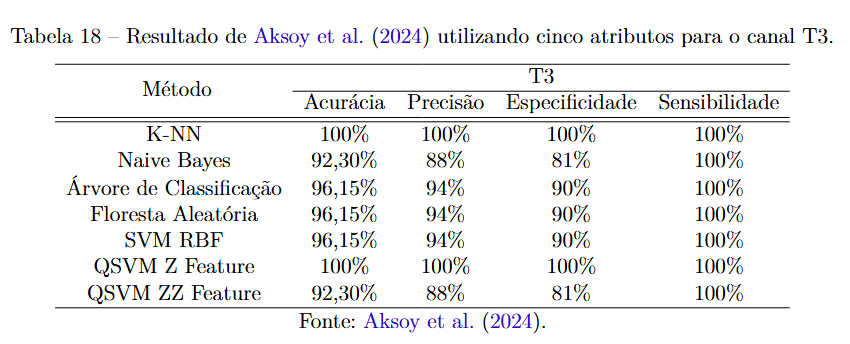

Referência: 
AKSOY, G. et al. Quantum machine-based decision support system for the detection of
schizophrenia from eeg records. Journal of Medical Systems, v. 48, 2024. ISSN 1573-689X.
Disponível em: <https://doi.org/10.1007/s10916-024-02048-0>.